DM Cours Tech. Agents 2 : **QLearning-Wumpus World**


---




MOULAI Mohamed Youcef

191931089336

G1 SII

In [ ]:
import numpy as np
import pandas as pd
import random
np.set_printoptions(linewidth=120)

Matrice de récompenses

In [ ]:
rewards=np.array([
   [ 0, -1,  0, 0, -1000,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
   [ -1,  0,  -1, 0, 0,  1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
   [ 0,  -1,  0, -1000, 0,  0, -1000, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
   [ 0,  0,  0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
   [ 0,  0,  0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
   [ 0,  0,  0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
   [ 0,  0,  0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
   [ 0,  0,  0, -1000, 0,  0, -1000, 0, 0, 0, 0, -1, 0, 0, 0, 0 ],
   [ 0,  0,  0, 0, -1000,  0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0 ],
   [ 0,  0,  0, 0, 0,  1000, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0 ],
   [ 0,  0,  0, 0, 0,  0, -1000, 0, 0, -1, 0, -1, 0, 0, -1000, 0 ],
   [ 0,  0,  0, 0, 0,  0, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1 ],
   [ 0,  0,  0, 0, 0,  0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0 ],
   [ 0,  0,  0, 0, 0,  0, 0, 0, 0, -1, 0, 0, -1, 0, -1000, 0 ],
   [ 0,  0,  0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
   [ 0,  0, 0, 0, 0,  0, 0, 0, 0, 0, 0, -1, 0, 0, -1000, 0 ]
    ])

rewards = rewards.astype(float)
np.place(rewards, rewards == 0, np.NaN)
print(rewards)

[[   nan    -1.    nan    nan -1000.    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [   -1.    nan    -1.    nan    nan  1000.    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [   nan    -1.    nan -1000.    nan    nan -1000.    nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [   nan    nan    nan -1000.    nan    nan -1000.    nan    nan    nan    nan    -1.    nan    nan    nan    nan]
 [   nan    nan    nan    nan -1000.    nan    nan    nan    nan    -1.    nan  



* Chemin possible (un pas) = *- 1*
* Chemin impossible        = *NaN*
* Puit / Wumpus            = *- 1000*
* Or                       = *+ 1000*

Selon l'exemple du cours:

* Etat initial = Ligne 12 (13-1) de notre matrice
* Etat but     = Ligne 5 (6-1) de notre matrice


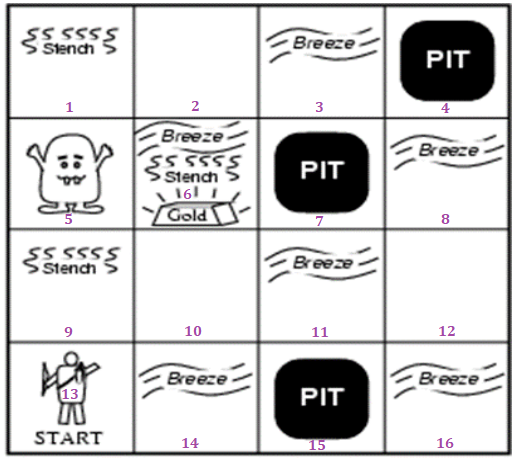

In [ ]:
#using pandas to display purposes
pd.DataFrame(rewards)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,-1.0,NaN,NaN,-1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.0,NaN,-1.0,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-1.0,NaN,-1000.0,NaN,NaN,-1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,-1000.0,NaN,NaN,-1000.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,-1000.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,-1.0,NaN,NaN


In [ ]:
def initialize_q(m,n):
    return np.zeros((m,n))
q_matrix=initialize_q(16,16)
pd.DataFrame(q_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def set_initial_state(state=15):

    # liste des états qui ne peuvent pas être des états initiaux
    final_states = np.array([3, 4, 5, 6, 14])
    
    while True:
      x = np.random.randint(0, state)
      if (final_states != x).all():
        return x


In [ ]:
def get_action(current_state, reward_matrix):

    valid = [-1, -1000, 1000]
    valid_actions=[]

    for action in enumerate(reward_matrix[current_state]):
        if (action [1] == valid).any(): # not NaN
            valid_actions += [action[0]]
    return random.choice(valid_actions)

In [ ]:
# To take some action, we need to know the current state
def take_action(current_state, reward_matrix, gamma, verbose=False):

    # liste des états qui représentent l'état Puit
    puit = np.array([3, 6, 14])
    # liste des états qui contiennent de la brise
    brise = np.array([2, 5, 7, 10, 13, 15])
    # liste des états qui contiennent de la puanteur
    fouha = np.array([0, 5, 8])

    action = get_action(current_state, reward_matrix)
    sa_reward = reward_matrix[current_state, action] # current_state-action reward
    ns_reward = max(q_matrix[action,])# next state-action reward
    q_current_state = sa_reward+(gamma*ns_reward)
    q_matrix[current_state, action] = q_current_state #matutes q_matrix
    new_state = action
    if verbose:
        print(q_matrix)
        print(f"Old State: {current_state} | New State: {new_state}\n\n")
        if new_state == 5:
            print("*Glitter... :o*")
            print(f"Victory : Player found treasure!")
        if (new_state == puit).any():
            print("*Scream*")
            print(f"Defeat : Player has fallen. :(")
        if new_state == 4:
            print("*Uh-oh*")
            print(f"Defeat : Player has been eaten by Wumpus. :(")
        if (new_state == brise).any():
            print(f"*Breeze sound*...")
        if (new_state == fouha).any():
            print(f"*Stinking smell*...")
        print()    

    return new_state

In [ ]:
def initialize_episode(reward_matrix, initial_state, gamma, verbose=False):

    # liste des états finaux {soit défaite, soit victoire}
    final_states = np.array([3, 4, 5, 6, 14])

    #Runs 1 episode unitl the agent reaches its goal-state
    current_state = initial_state
    while True: 
        if (current_state == final_states).any():
            break
        current_state = take_action(current_state, reward_matrix, gamma, verbose)
        

In [ ]:
def train_agent(iteration, reward_matrix, gamma, verbose=False):
    #Runs a given number of episodes
    print("Training in progress...")
    for episode in range(iteration):
        initial_state = set_initial_state()
        initialize_episode(reward_matrix, initial_state, gamma, verbose)

    print("Training complete!")
    return q_matrix


In [ ]:
def normalize_matrix(q_matrix):
    normalize_q=q_matrix/max(q_matrix[q_matrix.nonzero()])*100
    return normalize_q.astype(int)

In [ ]:
# Test run of single episode....
gamma=0.1
initial_state=12
initialize_episode(rewards, initial_state, gamma, True)
print("Q Table : ")
print(q_matrix)


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [64]:
#Test run of full training
gamma=0.8
q_table = train_agent(2000, rewards, gamma, False)

print(pd.DataFrame(q_matrix).to_string())

Training in progress...
Training complete!
       0      1      2       3       4       5       6        7      8      9      10      11      12     13      14       15
0     0.0  799.0    0.0     0.0 -1000.0     0.0     0.0    0.000    0.0    0.0    0.0    0.00    0.00    0.0     0.0    0.000
1   638.2    0.0  638.2     0.0     0.0  1000.0     0.0    0.000    0.0    0.0    0.0    0.00    0.00    0.0     0.0    0.000
2     0.0  799.0    0.0 -1000.0     0.0     0.0 -1000.0    0.000    0.0    0.0    0.0    0.00    0.00    0.0     0.0    0.000
3     0.0    0.0    0.0     0.0     0.0     0.0     0.0    0.000    0.0    0.0    0.0    0.00    0.00    0.0     0.0    0.000
4     0.0    0.0    0.0     0.0     0.0     0.0     0.0    0.000    0.0    0.0    0.0    0.00    0.00    0.0     0.0    0.000
5     0.0    0.0    0.0     0.0     0.0     0.0     0.0    0.000    0.0    0.0    0.0    0.00    0.00    0.0     0.0    0.000
6     0.0    0.0    0.0     0.0     0.0     0.0     0.0    0.000    0.0    

In [ ]:
#In DataFrame for display purposes
pd.DataFrame(normalize_matrix(q_table))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,79,0,0,-100,0,0,0,0,0,0,0,0,0,0,0
1,63,0,63,0,0,100,0,0,0,0,0,0,0,0,0,0
2,0,79,0,-100,0,0,-100,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,-100,0,0,-100,0,0,0,0,50,0,0,0,0
8,0,0,0,0,-100,0,0,0,0,79,0,0,50,0,0,0
9,0,0,0,0,0,100,0,0,63,0,63,0,0,63,0,0
